In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import chardet
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import pylab

In [2]:
with open('lateraldata.txt', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('lateraldata.txt', encoding=result['encoding'], sep=';', comment='#')
zdata=pd.read_csv('mess2.txt', encoding=result['encoding'], sep=';', comment='#')
#zdata

In [3]:
df0=df[(df['z[mm]']==0.0)]
df3=df[(df['z[mm]']==3.2)]
#df0,df3

In [4]:
g0=df0[['x[mm]','y[mm]','Value']].pivot(index='x[mm]', columns='y[mm]', values='Value')
g3=df3[['x[mm]','y[mm]','Value']].pivot(index='x[mm]', columns='y[mm]', values='Value')
#g0#,g3

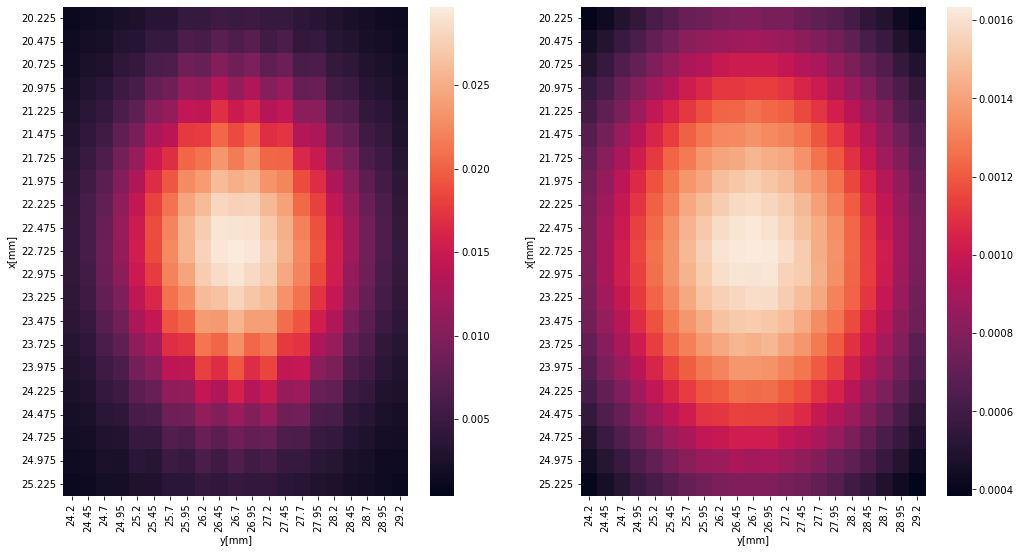

In [5]:
fig, ax_array = plt.subplots(1, 2,figsize=(17,9),squeeze=False)
sns.heatmap(data=g0,ax=ax_array[0,0],vmin=df['Value'].min(), vmax=df['Value'].max())

sns.heatmap(data=g3,ax=ax_array[0,1])


plt.show()

In [6]:
#g0.values
#plt.pcolor(g0.index.values,g0.columns.values, g0.values)

In [7]:
x0 = df0['x[mm]'].to_numpy()
y0 = df0['y[mm]'].to_numpy()
z0 = df0['Value'].to_numpy()
x3 = df3['x[mm]'].to_numpy()
y3 = df3['y[mm]'].to_numpy()
z3 = df3['Value'].to_numpy()

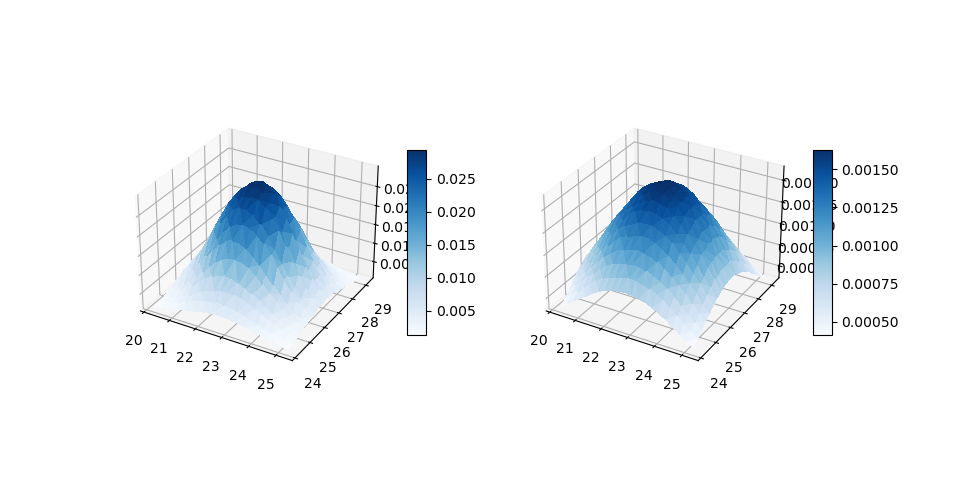

In [8]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm


fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_trisurf(x0,y0,z0,linewidth=0, antialiased=False, cmap=cm.Blues)
fig.colorbar(p, shrink=0.5, aspect=10)
#2
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_trisurf(x3,y3,z3,linewidth=0, antialiased=False, cmap=cm.Blues)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [9]:
X,Y=np.meshgrid(g0.index.values,g0.columns.values)


In [10]:
#z0.reshape((21,21))

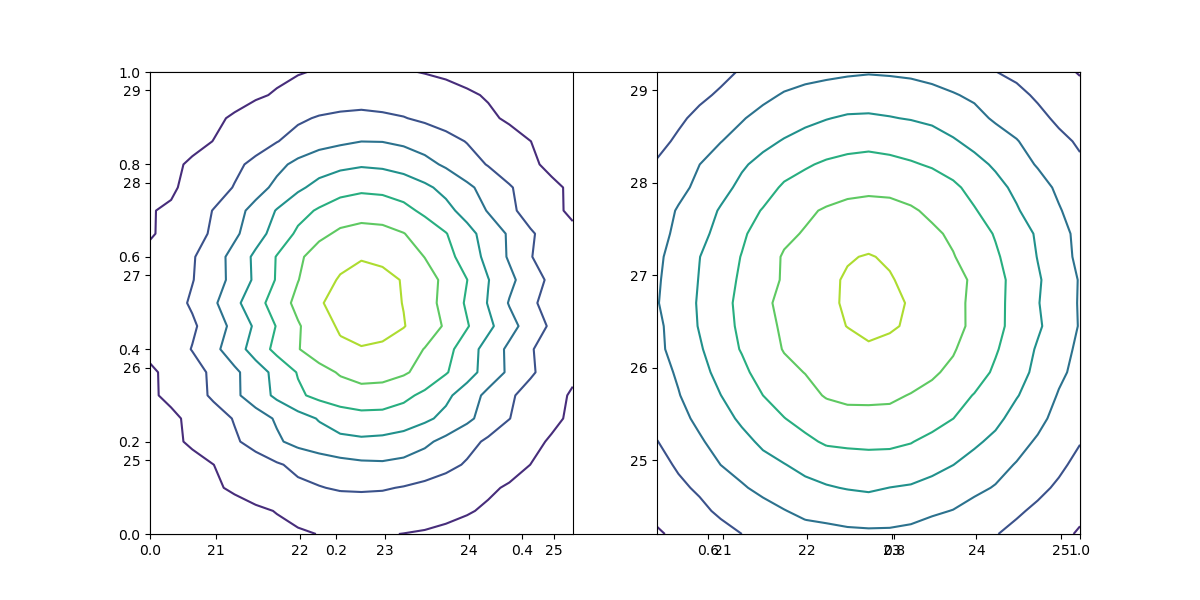

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1)
plt.contour(g0.index.values, g0.columns.values, z0.reshape((21,21)))

ax = fig.add_subplot(1, 2, 2)
plt.contour(g3.index.values, g3.columns.values, z3.reshape((21,21)))

plt.show()

In [12]:
def fmax(data):
    zmax=0
    row=0
    coll=0
    for row in g0.index:
        if g0.loc[row].max()>zmax:
            zmax=g0.loc[row].max()
            roww=row
    zmax=0
    for col in g0.columns:
        if g0.loc[:,col].max()>zmax:
            zmax=g0.loc[:,col].max()
            coll=col
            #print(zmax,g0.loc[:,col].max(),g0.loc[:,col].max()>zmax)
    return roww,coll

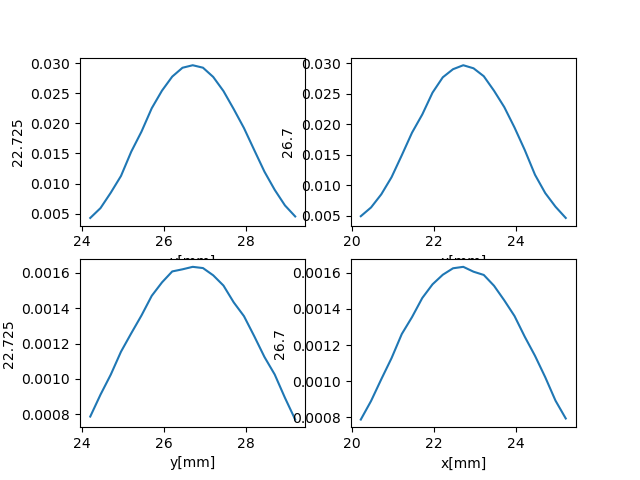

(22.725, 26.7)
(22.725, 26.7)


In [13]:
fig, ax_array = plt.subplots(2, 2,squeeze=False)

#print(y)
sns.lineplot(data=g0.loc[fmax(g0)[0]], ax=ax_array[0,0])
sns.lineplot(data=g0.loc[:,fmax(g0)[1]],ax=ax_array[0,1])

sns.lineplot(data=g3.loc[fmax(g3)[0]], ax=ax_array[1,0])
sns.lineplot(data=g3.loc[:,fmax(g3)[1]],ax=ax_array[1,1])

plt.show()
print(fmax(g0))
print(fmax(g3))



In [14]:
g0.columns.values

array([24.2 , 24.45, 24.7 , 24.95, 25.2 , 25.45, 25.7 , 25.95, 26.2 ,
       26.45, 26.7 , 26.95, 27.2 , 27.45, 27.7 , 27.95, 28.2 , 28.45,
       28.7 , 28.95, 29.2 ])

In [15]:
fmax(g0)

(22.725, 26.7)

In [16]:
g0.loc[:,26.2]

x[mm]
20.225    0.004566
20.475    0.005897
20.725    0.008171
20.975    0.010970
21.225    0.014130
21.475    0.017700
21.725    0.021090
21.975    0.023810
22.225    0.025960
22.475    0.027400
22.725    0.027800
22.975    0.027400
23.225    0.025920
23.475    0.023850
23.725    0.021290
23.975    0.017930
24.225    0.014400
24.475    0.011190
24.725    0.008326
24.975    0.006214
25.225    0.004405
Name: 26.2, dtype: float64

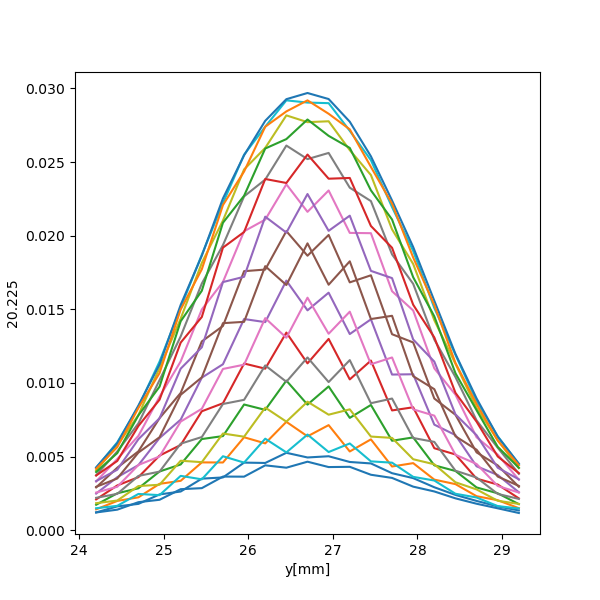

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
#i=0
#cm = pylab.get_cmap('gist_rainbow')
for row in g0.index:
    #i=i+1
    #color = cm(1.*i/21)
    sns.lineplot(data=g0.loc[row])
plt.show()

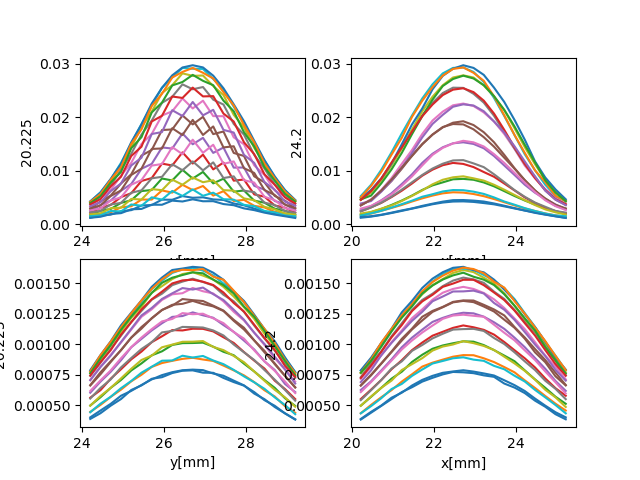

In [18]:
fig, ax_array = plt.subplots(2, 2,squeeze=False)#


for row in g0.index:
    sns.lineplot(data=g0.loc[row], ax=ax_array[0,0])
for col in g0.columns:
    sns.lineplot(data=g0.loc[:,col], ax=ax_array[0,1])
for row in g3.index:
    sns.lineplot(data=g3.loc[row], ax=ax_array[1,0])
for col in g3.columns:
    sns.lineplot(data=g3.loc[:,col], ax=ax_array[1,1])
plt.show()

/software/opt/focal/x86_64/python/3.10-2022.08/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


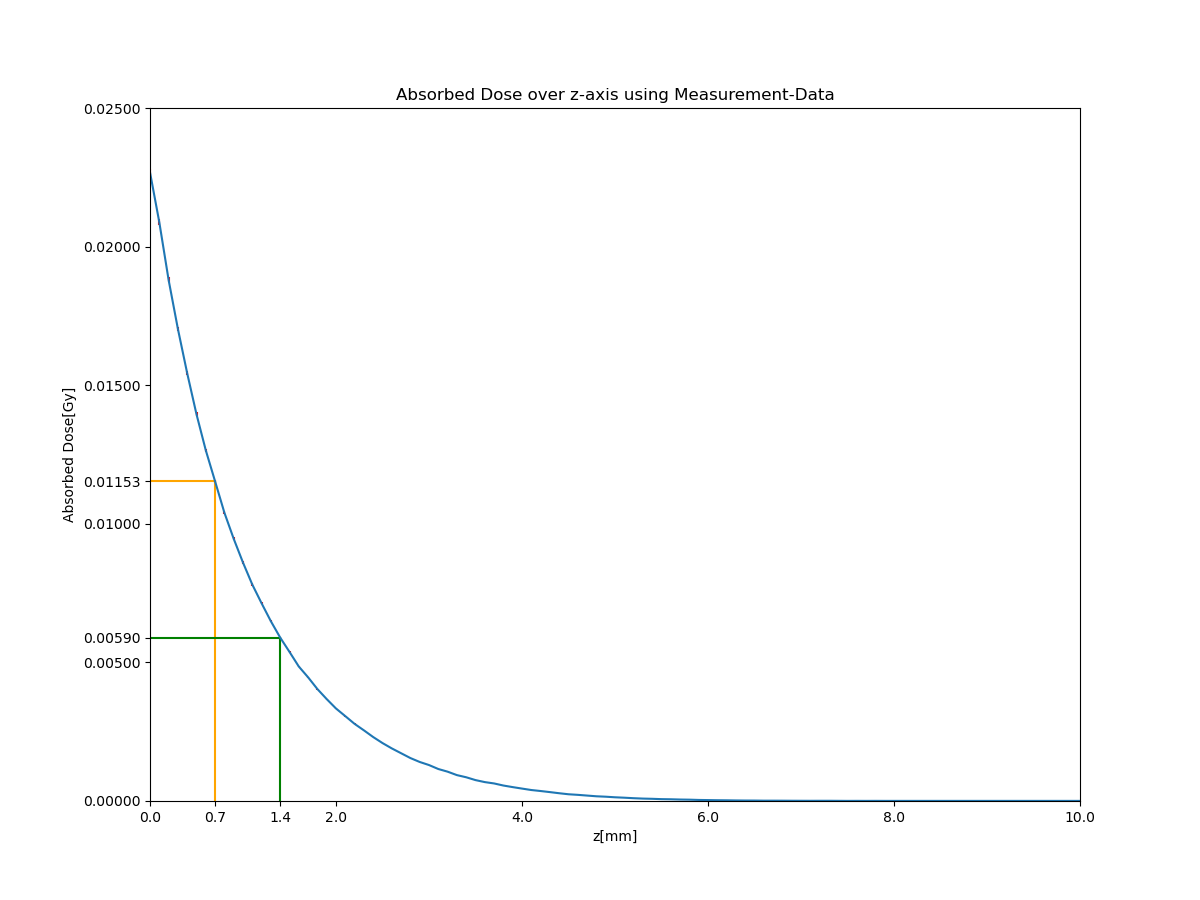

In [19]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

plt.errorbar(zdata['z[mm]'], zdata['Value'], yerr=err, fmt='-',ecolor='red')

ph=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['z[mm]'].to_numpy()[0],zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['Value'])
pq=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/4).abs().argsort()[:1]]['z[mm]'].to_numpy()[0],zdata.iloc[(zdata['Value']-zdata['Value'].max()/4).abs().argsort()[:1]]['Value'].to_numpy()[0])

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')

plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,pq[0])
ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,pq[1])
ax.set_yticks(xt)
plt.show()

In [20]:
zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['z[mm]']

7    0.7
Name: z[mm], dtype: float64

In [21]:
zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['Value'].to_numpy()[0]

0.01153

In [22]:
3e6*(np.exp(-7.63e-10*681527292))/7.63e-10

2337551964112075.0

In [23]:
len(zdata)

101

In [24]:
x=np.linspace(0.0000000001,10,101)
#(1/(x**2))

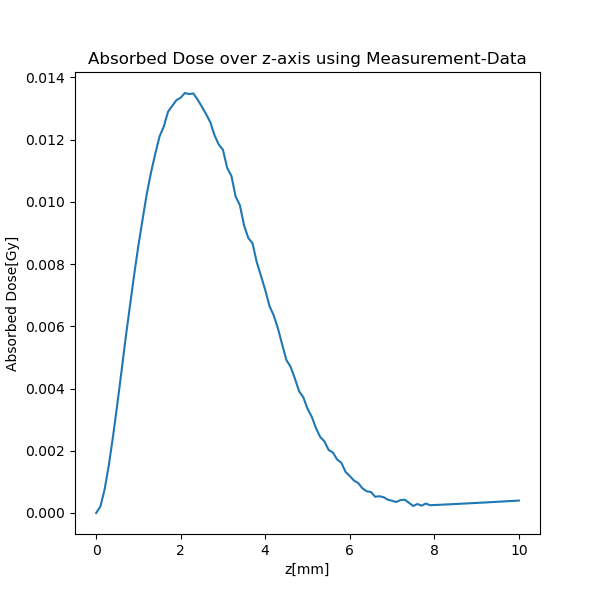

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(zdata['z[mm]'],zdata['Value']*(zdata['z[mm]']**2))
#plt.plot(x,(1/(x**2)/(np.max((1/(x**2))))),c='red')
plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.show()

In [26]:
err=[(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]

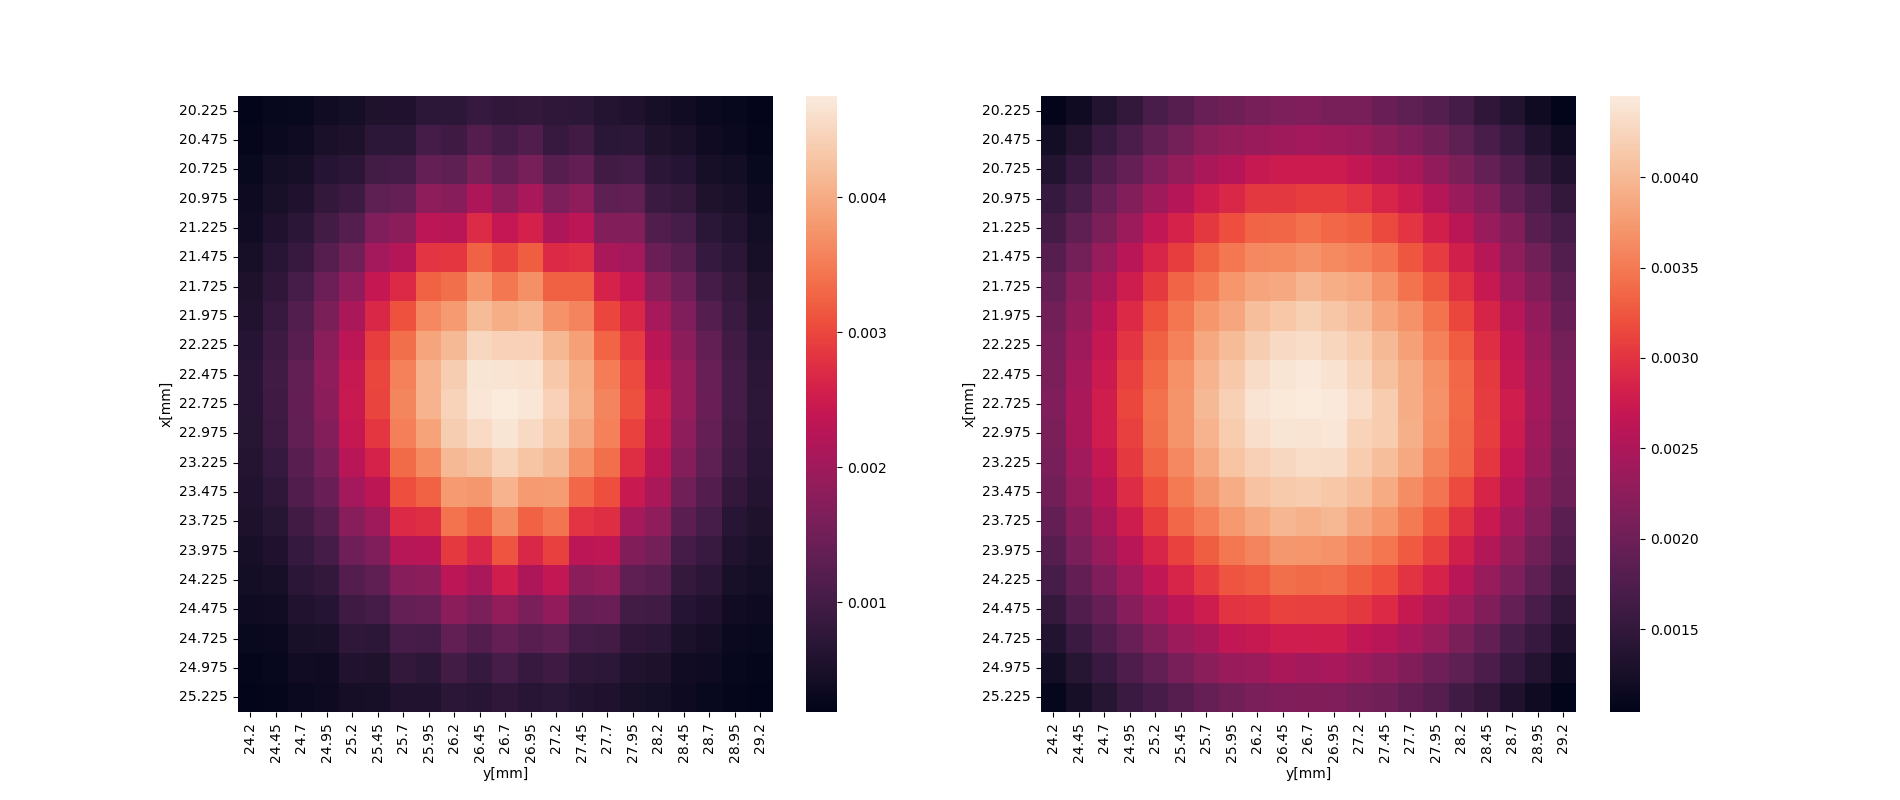

In [27]:
fig, ax_array = plt.subplots(1, 2,figsize=(19,8),squeeze=False)
sns.heatmap(data=g0*(0.4**2),ax=ax_array[0,0])#,vmin=df['Value'].min(), vmax=df['Value'].max())
sns.heatmap(data=g3*((1.65)**2),ax=ax_array[0,1])


plt.show()

In [28]:
import matplotlib.colors as mcolors


def symmetrical_colormap(cmap_settings, new_name = None ):
    ''' This function take a colormap and create a new one, as the concatenation of itself by a symmetrical fold.
    '''
    # get the colormap
    cmap = plt.cm.get_cmap(*cmap_settings)
    if not new_name:
        new_name = "sym_"+cmap_settings[0]  # ex: 'sym_Blues'
    
    # this defined the roughness of the colormap, 128 fine
    n= 128 
    
    # get the list of color from colormap
    colors_r = cmap(np.linspace(0, 1, n))    # take the standard colormap # 'right-part'
    colors_l = colors_r[::-1]                # take the first list of color and flip the order # "left-part"

    # combine them and build a new colormap
    colors = np.vstack((colors_l, colors_r))
    mymap = mcolors.LinearSegmentedColormap.from_list(new_name, colors)

    return mymap

In [29]:
cmap_settings = ('Blues', None)  # provide int instead of None to "discretize/bin" the colormap
mymap = symmetrical_colormap(cmap_settings= cmap_settings, new_name =None )


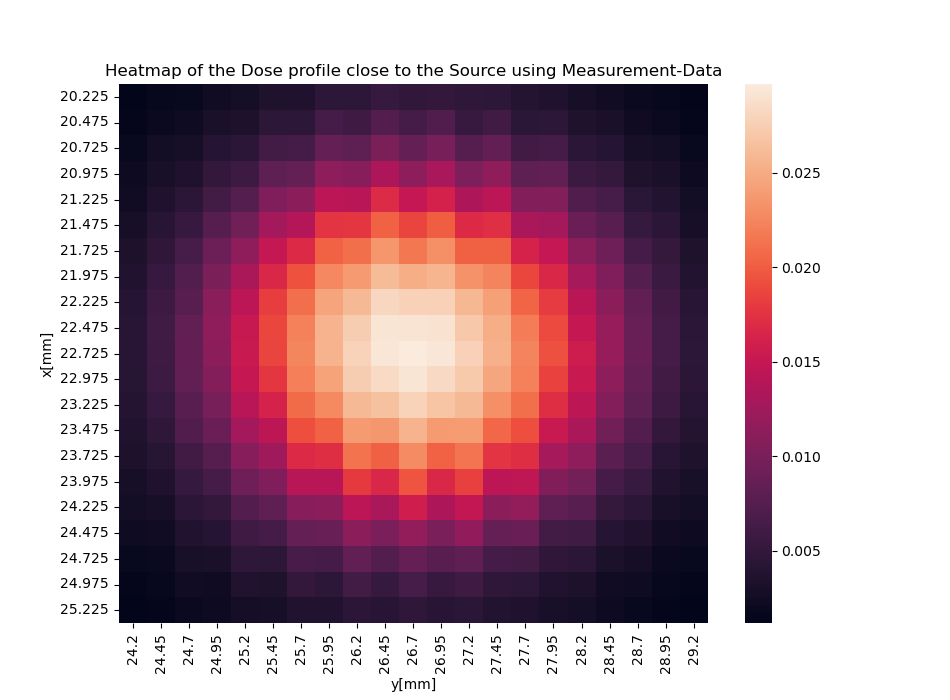

In [30]:
fig, ax = plt.subplots(figsize=(9.5,7))
sns.heatmap(data=g0)
plt.title('Heatmap of the Dose profile close to the Source using Measurement-Data')
plt.show()

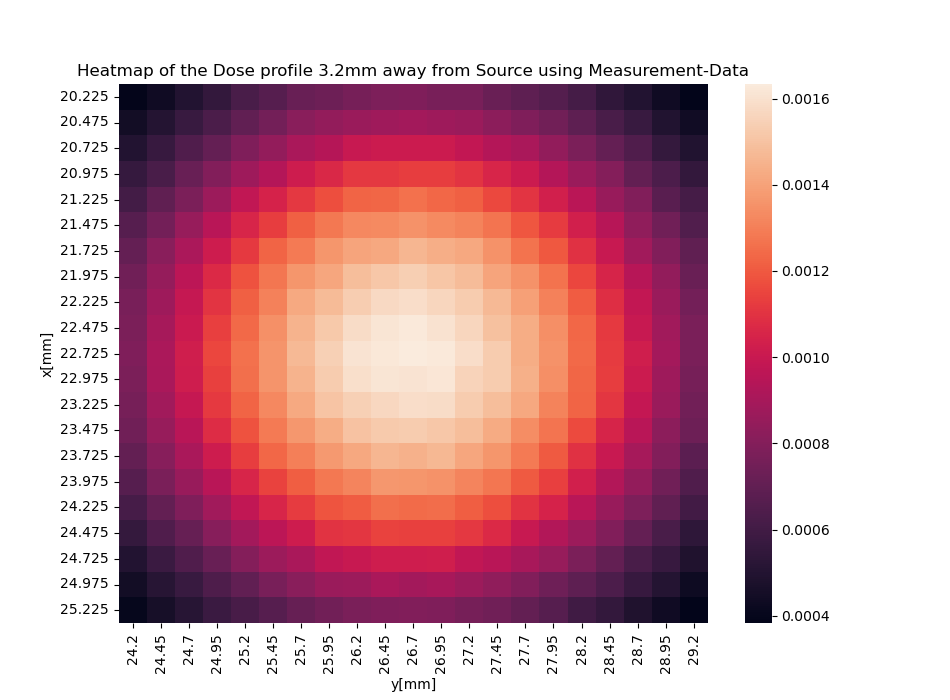

In [31]:
fig, ax = plt.subplots(figsize=(9.5,7))
sns.heatmap(data=g3)
plt.title('Heatmap of the Dose profile 3.2mm away from Source using Measurement-Data')
plt.show()